Task

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings


In [4]:
sns.set(style="whitegrid")


LOAD THE DATASET

In [9]:
train = pd.read_csv('C:\\Internship\\TASK5\\train.csv')
test = pd.read_csv('C:\\Internship\\TASK5\\test.csv')
gender_submission = pd.read_csv('C:\\Internship\\TASK5\\gender_submission.csv')

# Part 1:eda on train

In [ ]:
print("\nFirst 5 Rows:\n")
print(train.head())

print("\n--- Train Dataset Info ---\n")
train.info()

print("\n--- Train Dataset Statistical Summary ---\n")
print(train.describe(include='all'))

print("\n--- Train Dataset Missing Values ---\n")
print(train.isnull().sum())


First 5 Rows:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

# Fill missing Age and Embarked

In [ ]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Fill missing values in test.csv

In [13]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Categorical Plots

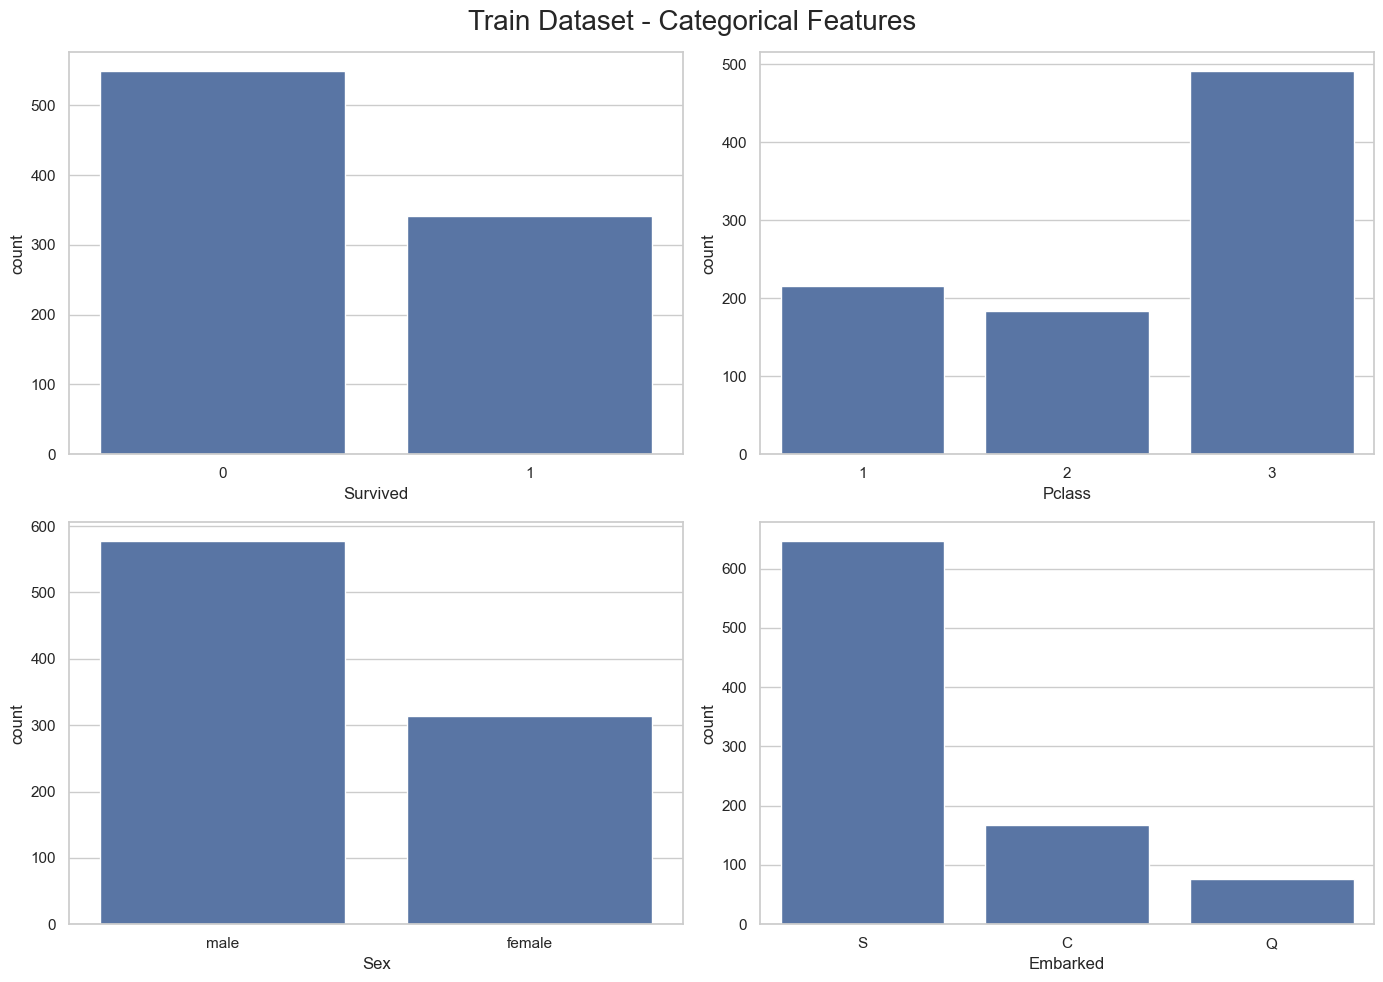

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))
sns.countplot(x='Survived', data=train, ax=axs[0,0])
sns.countplot(x='Pclass', data=train, ax=axs[0,1])
sns.countplot(x='Sex', data=train, ax=axs[1,0])
sns.countplot(x='Embarked', data=train, ax=axs[1,1])
fig.suptitle('Train Dataset - Categorical Features', fontsize=20)
plt.tight_layout()
plt.show()

# Histograms and Boxplots

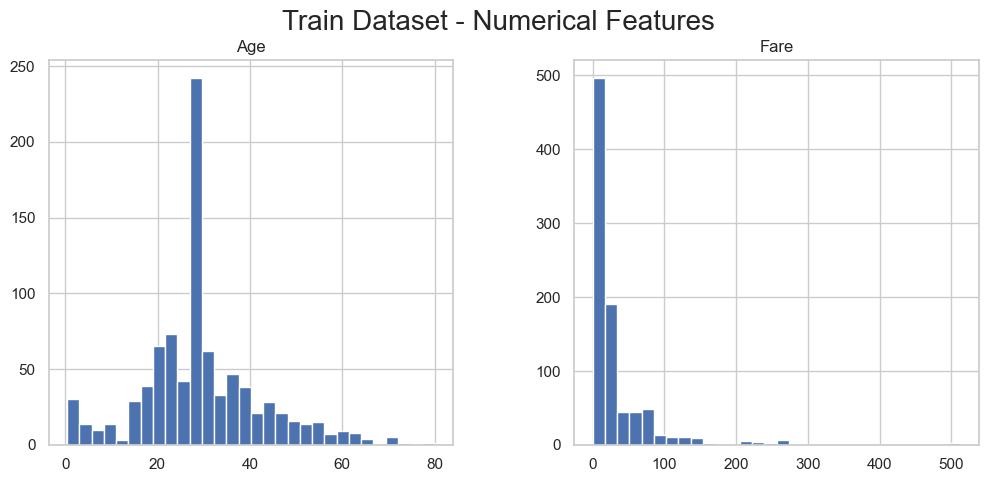

In [15]:
train[['Age', 'Fare']].hist(bins=30, figsize=(12,5))
plt.suptitle('Train Dataset - Numerical Features', fontsize=20)
plt.show()

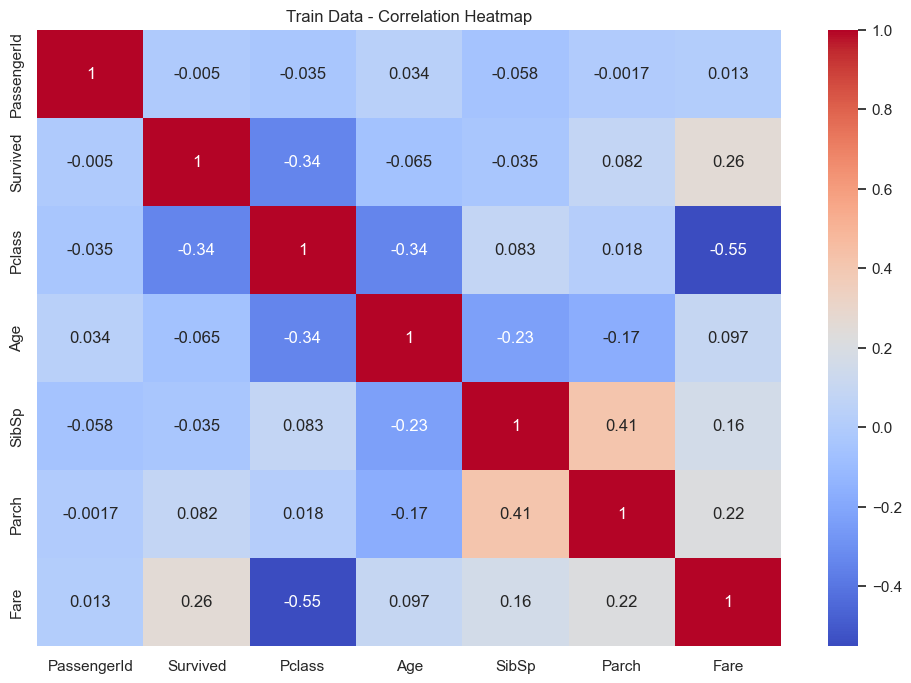

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(train.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Train Data - Correlation Heatmap')
plt.show()

C:\Users\PARASHAR'S\AppData\Local\Temp\ipykernel_3084\1101260851.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=train, ci=None)


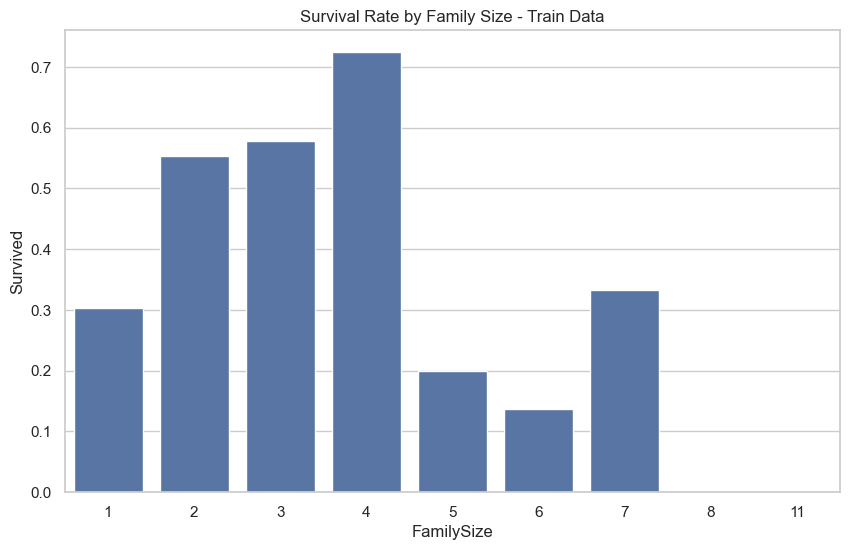

In [18]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
plt.figure(figsize=(10,6))
sns.barplot(x='FamilySize', y='Survived', data=train, ci=None)
plt.title('Survival Rate by Family Size - Train Data')
plt.show()


# Part 2: EDA on test

In [19]:
print("\n--- Test Dataset First 5 Rows ---\n")
print(test.head())

print("\n--- Test Dataset Info ---\n")
test.info()

print("\n--- Test Dataset Missing Values ---\n")
print(test.isnull().sum())


--- Test Dataset First 5 Rows ---

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

--- Test Dataset Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Col

# Fill missing values in test

In [20]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

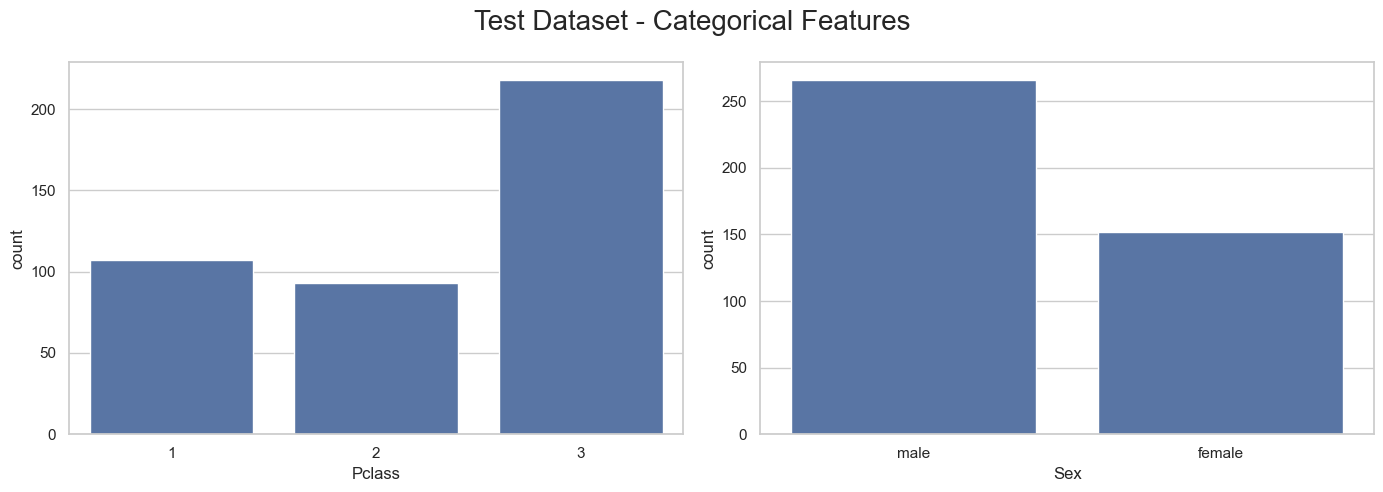

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(x='Pclass', data=test, ax=axs[0])
sns.countplot(x='Sex', data=test, ax=axs[1])
fig.suptitle('Test Dataset - Categorical Features', fontsize=20)
plt.tight_layout()
plt.show()

# Part 3: EDA on gender_submission

In [22]:
print("\n--- Gender Submission First 5 Rows ---\n")
print(gender_submission.head())



--- Gender Submission First 5 Rows ---

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [23]:
submission = pd.merge(test, gender_submission, on='PassengerId', how='left')

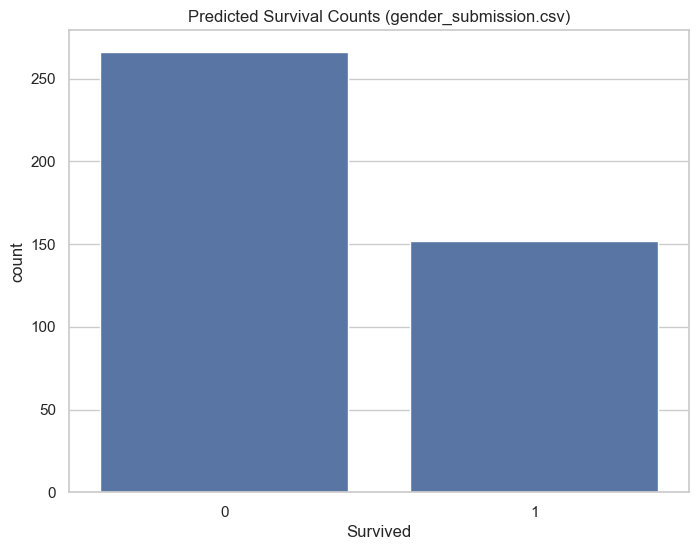

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=submission)
plt.title('Predicted Survival Counts (gender_submission.csv)')
plt.show()

# Observations and Summary

In [25]:
print("\nObservations:")
print("- In train data: Females and 1st class passengers had better survival rates.")
print("- Age and Fare had some outliers, but no extreme skew after filling missing values.")
print("- In test data: Pclass and Sex distributions similar to train data.")
print("- gender_submission predicts higher survival for females, matching train patterns.")

print("\nSummary:")
print("- Used pandas, matplotlib, seaborn for analysis.")
print("- All missing values handled properly.")
print("- Created new feature FamilySize.")
print("- Built correlation analysis, pairplots, categorical analysis.")
print("- Explored both train, test, and gender_submission datasets in depth.")



Observations:
- In train data: Females and 1st class passengers had better survival rates.
- Age and Fare had some outliers, but no extreme skew after filling missing values.
- In test data: Pclass and Sex distributions similar to train data.
- gender_submission predicts higher survival for females, matching train patterns.

Summary:
- Used pandas, matplotlib, seaborn for analysis.
- All missing values handled properly.
- Created new feature FamilySize.
- Built correlation analysis, pairplots, categorical analysis.
- Explored both train, test, and gender_submission datasets in depth.
